In [8]:
import pandas as pd
import glob
import os

# Carpeta con los CSV
path = "Datos/Originales/*.csv"
files = glob.glob(path)

dfs = []

for f in files:
    # Nombre del dataset sin extensión (ej: "AAPL")
    name = os.path.splitext(os.path.basename(f))[0]

    # Leer CSV
    temp = pd.read_csv(f, index_col='date')  # asumimos que la primera columna es fecha o índice
    temp.index = pd.to_datetime(temp.index)  # asegurar índice tipo fecha
    temp = temp[~temp.index.duplicated()]    # eliminar posibles duplicados

    # Crear MultiIndex en columnas: (columna original, nombre dataset)
    temp.columns = pd.MultiIndex.from_product([temp.columns, [name]])

    dfs.append(temp)

# Concatenar todos los DataFrames por columnas
df = pd.concat(dfs, axis=1)
df = df.close
df.columns = df.columns.str.replace("_marketstack", "", regex=False)

<Axes: xlabel='date'>

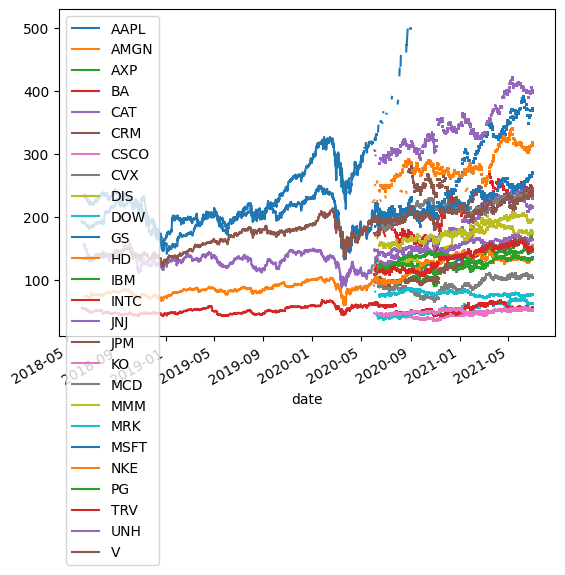

In [9]:
df.plot()

In [10]:
# 1. Crear nueva columna auxiliar solo con la fecha (sin hora)
df['date_only'] = df.index.date

# 2. Agrupar por esa fecha y seleccionar el último registro de cada día
df = df.groupby('date_only').last()

# 3. (Opcional) Reindexar para usar esa nueva columna como índice datetime solo con la fecha
df.index = pd.to_datetime(df.index)
df.index.name = 'date'
df.index = df.index.date

In [11]:
df.head()

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,KO,MCD,MMM,MRK,MSFT,NKE,PG,TRV,UNH,V
2018-06-06,194.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-07,193.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-08,191.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-09,191.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-11,191.16,NaN,NaN,NaN,156.35,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,133.88


In [12]:
df.shape

(954, 26)

In [13]:
# Máscara para filas cuyo índice (fecha) es sábado (5) o domingo (6)
mask_weekend = pd.to_datetime(df.index).weekday >= 5

# Filtrar: eliminar solo filas que tienen NA y son fines de semana
df = df[~(mask_weekend)]
df = df.drop(df.index[-1])

In [14]:
df

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,KO,MCD,MMM,MRK,MSFT,NKE,PG,TRV,UNH,V
2018-06-06,194.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-07,193.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-08,191.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-11,191.16,NaN,NaN,NaN,156.350,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,133.88
2018-06-12,192.32,NaN,NaN,NaN,157.485,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,74.30,NaN,NaN,NaN,134.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-24,133.70,238.71,166.02,243.57,213.790,241.84,52.76,106.27,175.33,63.15,...,54.12,233.24,192.36,75.58,265.275,133.10,132.93,147.90,395.56,234.68
2021-06-25,133.41,240.95,168.21,250.57,219.340,243.77,52.78,107.14,177.93,63.11,...,54.39,233.33,193.26,76.36,266.690,133.60,133.02,149.97,398.87,236.24
2021-06-28,133.11,242.68,169.45,248.38,216.310,241.87,53.06,107.30,178.35,63.29,...,54.32,232.42,194.75,77.20,265.020,154.35,134.92,151.72,404.95,237.32
2021-06-29,134.78,242.84,164.78,239.96,216.270,244.57,52.96,103.99,176.57,62.90,...,54.26,231.09,196.50,76.86,268.720,152.36,135.32,149.45,401.46,234.09


In [15]:
df.isna().sum()

AAPL      5
AMGN    523
AXP     523
BA      523
CAT       8
CRM     523
CSCO    523
CVX     523
DIS     523
DOW     525
GS        8
HD      525
IBM     525
INTC      6
JNJ     523
JPM     523
KO      523
MCD     523
MMM     526
MRK     526
MSFT    526
NKE       9
PG      525
TRV     526
UNH     526
V         7
dtype: int64

In [16]:
import yfinance as yf
import pandas as pd

nombres = df.columns.tolist()
datos = {}

for nombre in nombres:
    ticker_obj = yf.Ticker(nombre)
    historial = ticker_obj.history(start='2018-06-06', end='2021-07-01')
    # Solo tomar la columna 'Close'
    datos[nombre] = historial['Close']

# Crear un DataFrame con las series temporales de cierre por empresa
df_finance = pd.DataFrame(datos)
df_finance.index = df_finance.index.date

In [17]:
df_final = df.fillna(df_finance)

In [18]:
df_final.isna().sum()

AAPL      1
AMGN     20
AXP      20
BA       20
CAT       1
CRM      20
CSCO     20
CVX      20
DIS      20
DOW     217
GS        1
HD       20
IBM      20
INTC      1
JNJ      20
JPM      20
KO       20
MCD      20
MMM      20
MRK      20
MSFT     20
NKE       1
PG       20
TRV      19
UNH      19
V         0
dtype: int64

In [19]:
df_final

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,KO,MCD,MMM,MRK,MSFT,NKE,PG,TRV,UNH,V
2018-06-06,194.00,147.111755,91.250519,357.617065,132.681229,134.138977,35.390247,89.986595,97.482864,NaN,...,34.410645,137.123901,131.013794,46.958908,95.293922,68.293915,61.173698,109.253738,220.979385,129.619110
2018-06-07,193.50,146.911377,91.711411,354.700806,132.494736,131.526459,34.902504,92.597649,98.018547,NaN,...,34.394802,143.119537,131.791382,47.004398,93.796997,68.303032,62.333824,110.764534,221.272629,127.298370
2018-06-08,191.51,147.712875,91.277634,355.634369,131.672424,132.139999,34.766563,92.218407,99.462944,NaN,...,34.798615,142.638184,132.768250,47.451775,94.494324,68.430962,63.502174,112.087524,222.783432,128.154388
2018-06-11,191.16,147.961349,91.458359,357.020325,156.350000,132.585327,34.934483,93.035263,99.816872,NaN,...,34.941135,140.594604,131.823578,47.262203,93.955070,68.147743,63.790142,111.387581,225.538467,133.880000
2018-06-12,192.32,148.329987,91.033607,356.712341,157.485000,134.841599,35.134380,92.685181,99.797737,NaN,...,35.162823,140.797272,131.695053,47.345615,94.196777,74.300000,63.551537,110.602356,225.360764,134.880000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-24,133.70,238.710000,166.020000,243.570000,213.790000,241.840000,52.760000,106.270000,175.330000,63.15,...,54.120000,233.240000,192.360000,75.580000,265.275000,133.100000,132.930000,147.900000,395.560000,234.680000
2021-06-25,133.41,240.950000,168.210000,250.570000,219.340000,243.770000,52.780000,107.140000,177.930000,63.11,...,54.390000,233.330000,193.260000,76.360000,266.690000,133.600000,133.020000,149.970000,398.870000,236.240000
2021-06-28,133.11,242.680000,169.450000,248.380000,216.310000,241.870000,53.060000,107.300000,178.350000,63.29,...,54.320000,232.420000,194.750000,77.200000,265.020000,154.350000,134.920000,151.720000,404.950000,237.320000
2021-06-29,134.78,242.840000,164.780000,239.960000,216.270000,244.570000,52.960000,103.990000,176.570000,62.90,...,54.260000,231.090000,196.500000,76.860000,268.720000,152.360000,135.320000,149.450000,401.460000,234.090000


In [20]:
fecha_inicio = pd.to_datetime(df_final.index.min())
fecha_fin = pd.to_datetime(df_final.index.max())
splits_dict = {}
for symbol in df_final.columns:
    ticker = yf.Ticker(symbol)
    splits = ticker.splits
    if not splits.empty and not isinstance(splits.index, pd.DatetimeIndex):
        splits.index = pd.to_datetime(splits.index)
    if not splits.empty and splits.index.tz is not None:
        splits.index = splits.index.tz_convert(None)
    splits_filtrados = splits[(splits.index >= fecha_inicio) & (splits.index <= fecha_fin)] if not splits.empty else splits
    if not splits_filtrados.empty:
        splits_dict[symbol] = splits_filtrados
if splits_dict:
    print("Splits detectados:")
    for symbol, splits in splits_dict.items():
        print(f"{symbol}:\n{splits}")
else:
    print("Ningúno tienen algun splits.")
df_finalisimo = df_final.copy()
for symbol in splits_dict.keys():
    splits = splits_dict[symbol]
    for fecha_split, factor in splits.items():
        if isinstance(fecha_split, pd.Timestamp):
            fecha_split_ts = fecha_split
        else:
            fecha_split_ts = pd.Timestamp(fecha_split)
        idx_ts = pd.to_datetime(df_finalisimo.index)
        mask = idx_ts < fecha_split_ts
        df_finalisimo.loc[mask, symbol] = df_finalisimo.loc[mask, symbol] / factor
df_finalisimo.head()

Splits detectados:
AAPL:
Date
2020-08-31 04:00:00    4.0
Name: Stock Splits, dtype: float64
MRK:
Date
2021-06-03 04:00:00    1.048
Name: Stock Splits, dtype: float64


,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,KO,MCD,MMM,MRK,MSFT,NKE,PG,TRV,UNH,V
2018-06-06,48.5000,147.111755,91.250519,357.617065,132.681229,134.138977,35.390247,89.986595,97.482864,NaN,...,34.410645,137.123901,131.013794,44.808118,95.293922,68.293915,61.173698,109.253738,220.979385,129.619110
2018-06-07,48.3750,146.911377,91.711411,354.700806,132.494736,131.526459,34.902504,92.597649,98.018547,NaN,...,34.394802,143.119537,131.791382,44.851525,93.796997,68.303032,62.333824,110.764534,221.272629,127.298370
2018-06-08,47.8775,147.712875,91.277634,355.634369,131.672424,132.139999,34.766563,92.218407,99.462944,NaN,...,34.798615,142.638184,132.768250,45.278411,94.494324,68.430962,63.502174,112.087524,222.783432,128.154388
2018-06-11,47.7900,147.961349,91.458359,357.020325,156.350000,132.585327,34.934483,93.035263,99.816872,NaN,...,34.941135,140.594604,131.823578,45.097522,93.955070,68.147743,63.790142,111.387581,225.538467,133.880000
2018-06-12,48.0800,148.329987,91.033607,356.712341,157.485000,134.841599,35.134380,92.685181,99.797737,NaN,...,35.162823,140.797272,131.695053,45.177114,94.196777,74.300000,63.551537,110.602356,225.360764,134.880000


In [21]:
df_final = df_finalisimo.drop('DOW', axis=1)

In [22]:
df_final = df_final.interpolate(method='linear', axis=0)

In [23]:
df_final.isna().sum()

AAPL    0
AMGN    0
AXP     0
BA      0
CAT     0
CRM     0
CSCO    0
CVX     0
DIS     0
GS      0
HD      0
IBM     0
INTC    0
JNJ     0
JPM     0
KO      0
MCD     0
MMM     0
MRK     0
MSFT    0
NKE     0
PG      0
TRV     0
UNH     0
V       0
dtype: int64

In [24]:
df_final.to_csv('Datos/Transformados/dow_jones_clean.csv', index=True)